### Car Brand Classification Using Deep Learning

In [3]:
###importing required libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from glob import glob

In [5]:
#resize all images to this shape
IMAGE_SIZE = [224, 224]

In [15]:
#loading dataset
train_path = "C:/PythonCSV/CSV_file/Datasets/train"
valid_path = "C:/PythonCSV/CSV_file/Datasets/test"

In [7]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of 
# Here we will be using imagenet weights
#IMAGE_SIZE + [3] = RGB 

In [8]:
#now initialize resent50
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

94773248/94765736 [==============================] - 203s 2us/step


In [18]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [9]:
#now we don't want to train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [13]:
#useful for getting number of output classes
folders = glob("C:/PythonCSV/CSV_file/Datasets/train/*")

In [14]:
len(folders) #here we can see that 3 output classes.

3

In [17]:
folders

['C:/PythonCSV/CSV_file/Datasets/train\\audi',
 'C:/PythonCSV/CSV_file/Datasets/train\\lamborghini',
 'C:/PythonCSV/CSV_file/Datasets/train\\mercedes']

In [16]:
x = Flatten()(resnet.output)

In [19]:
#output layer
prediction = Dense(len(folders), activation = 'softmax')(x)

In [32]:
#create model object 
model = Model(inputs = resnet.input, outputs = prediction)

In [33]:
#now we see summary
#here we can see that output layer is added.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

flatten (Flatten)               (None, 100352)       0           conv5_block3_out[0][0]           
__________________________________________________________________________________________________
dense (Dense)                   (None, 3)            301059      flatten[0][0]                    
Total params: 23,888,771
Trainable params: 301,059
Non-trainable params: 23,587,712
__________________________________________________________________________________________________


In [34]:
#Now we compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
#Now we use the Image Data Generator to import the images from the dataset
#here we doing data augmentation on train dataset
#image pixel size range from 0 to 255. 
#so here we rescalling size of image.
#Bcoz we image size will be different that why we do rescale image.s
train_datagen = ImageDataGenerator(rescale= 1./255,shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip= True)

In [36]:
#we dont do the data augmentation on test dataset
test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
# Make sure you provide the same target size as initialied for the image size
#here we use class mode = categorical when we have more than two classes.
training_set = train_datagen.flow_from_directory("C:/PythonCSV/CSV_file/Datasets/train",
                                                target_size = (224, 224),
                                                batch_size = 30,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [38]:
test_set = test_datagen.flow_from_directory("C:/PythonCSV/CSV_file/Datasets/test",
                                           target_size = (224,224),
                                           batch_size = 30,
                                           class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
#Here we can see that model is overfitting,so we d some hypermeter tuning.

In [39]:
#Now we fit the model.
r = model.fit(training_set,
             validation_data = test_set,
             epochs = 30,
             steps_per_epoch= len(training_set),
             validation_steps= len(test_set))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 2 steps
Epoch 1/30
3/3 [==============================] - 76s 25s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 34.2380 - val_accuracy: 0.3276
Epoch 2/30
3/3 [==============================] - 57s 19s/step - loss: 6.4199e-08 - accuracy: 1.0000 - val_loss: 34.0690 - val_accuracy: 0.3276
Epoch 3/30
3/3 [==============================] - 57s 19s/step - loss: 1.2110e-07 - accuracy: 1.0000 - val_loss: 34.1632 - val_accuracy: 0.3276
Epoch 4/30
3/3 [==============================] - 58s 19s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 34.3002 - val_accuracy: 0.3276
Epoch 5/30
3/3 [==============================] - 62s 21s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 34.4002 - val_accuracy: 0.3276
Epoch 6/30
3/3 [==============================] - 62s 21s/step - loss: 0.0721 - accuracy: 0.9844 - val_loss: 33.7675 - val_accuracy: 0.3276
Epoch 7/30
3/3 [==============================] - 

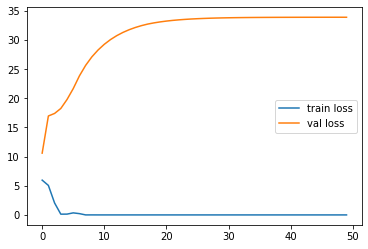

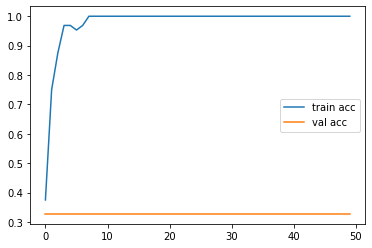

<Figure size 432x288 with 0 Axes>

In [29]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
y_pred = model.predict(test_set)

In [31]:
y_pred

array([[1.32035746e-19, 4.48401350e-23, 1.00000000e+00],
       [2.03348873e-19, 1.95091865e-23, 1.00000000e+00],
       [2.49682836e-20, 1.35380690e-24, 1.00000000e+00],
       [5.81980110e-20, 2.58979643e-24, 1.00000000e+00],
       [2.49383116e-19, 1.16256278e-23, 1.00000000e+00],
       [6.43918102e-20, 2.44244786e-24, 1.00000000e+00],
       [3.74606770e-20, 4.69595999e-24, 1.00000000e+00],
       [6.78250233e-20, 3.99560849e-24, 1.00000000e+00],
       [3.04469512e-20, 8.57203278e-25, 1.00000000e+00],
       [1.01756450e-19, 1.70902357e-24, 1.00000000e+00],
       [1.97187143e-20, 2.26599802e-24, 1.00000000e+00],
       [2.58685938e-20, 2.14334238e-24, 1.00000000e+00],
       [1.28013955e-19, 4.35209386e-23, 1.00000000e+00],
       [1.18521437e-19, 7.88994459e-24, 1.00000000e+00],
       [7.19123941e-20, 6.02265167e-24, 1.00000000e+00],
       [4.26712557e-20, 3.07205905e-24, 1.00000000e+00],
       [7.55878290e-20, 3.08050815e-24, 1.00000000e+00],
       [1.33018023e-19, 2.93277